In [1]:
import h5py as h5
import matplotlib.pyplot as pp
import numpy as np
from sklearn.manifold import TSNE

%matplotlib inline

In [52]:
def read_data(file_path, gesture):
    with h5.File(file_path) as f:
        label_index = list(f["label_index"])
        data = []
        rel_time = []
        num_events = []
    
        gesture_index = label_index.index(gesture)
        
        def collect_data(name, obj):
            if not (isinstance(obj, h5.Group) and "data" in obj and "labels" in obj):
                return
            
            labels = np.array(obj["labels"])
            fltr = labels == gesture_index
            
            data.append(np.array(obj["data"])[fltr])
            rel_time.append(np.linspace(0.0, 1.0, num=np.count_nonzero(fltr)))
            num_events.append(np.log(1 + np.array(obj["num_events"])[fltr]))
        
        f.visititems(collect_data)
        
    return np.concatenate(data), np.concatenate(rel_time), np.concatenate(num_events)

In [53]:
data, rel_time, num_events = read_data("/home/cqql/Seafile/thesis/16-gestures/data/val/gists.h5", "zoom-out")

In [54]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=1000, verbose=2)
data2d = tsne.fit_transform(data)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2937
[t-SNE] Computed conditional probabilities for sample 2000 / 2937
[t-SNE] Computed conditional probabilities for sample 2937 / 2937
[t-SNE] Mean sigma: 1.050352
[t-SNE] Iteration 25: error = 2.0415156, gradient norm = 0.0066478
[t-SNE] Iteration 50: error = 1.9419075, gradient norm = 0.0045413
[t-SNE] Iteration 75: error = 1.6770827, gradient norm = 0.0016130
[t-SNE] Iteration 100: error = 1.6306493, gradient norm = 0.0012880
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.630649
[t-SNE] Iteration 125: error = 1.5575615, gradient norm = 0.0009769
[t-SNE] Iteration 125: gradient norm 0.000977. Finished.
[t-SNE] Error after 125 iterations: 1.630649


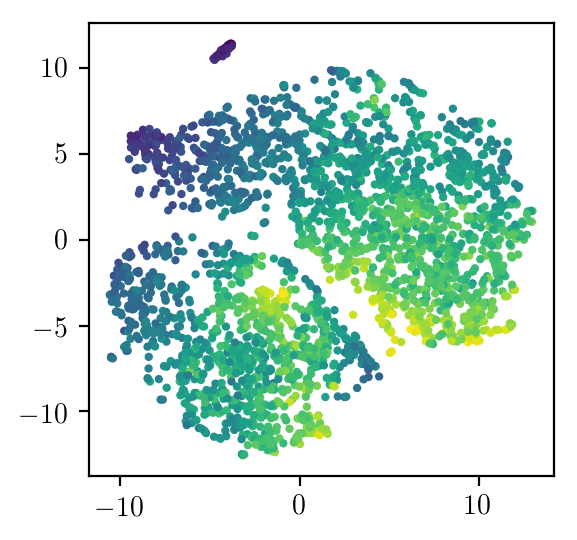

In [55]:
fig, ax = pp.subplots(figsize=(3, 3), dpi=200)

ax.scatter(data2d[:, 0], data2d[:, 1], c=num_events, s=4)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2553
[t-SNE] Computed conditional probabilities for sample 2000 / 2553
[t-SNE] Computed conditional probabilities for sample 2553 / 2553
[t-SNE] Mean sigma: 1.081188
[t-SNE] Iteration 25: error = 1.9638023, gradient norm = 0.0063534
[t-SNE] Iteration 50: error = 1.8478142, gradient norm = 0.0052342
[t-SNE] Iteration 75: error = 1.5518148, gradient norm = 0.0017676
[t-SNE] Iteration 100: error = 1.5041982, gradient norm = 0.0020986
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.504198
[t-SNE] Iteration 125: error = 1.4262456, gradient norm = 0.0010641
[t-SNE] Iteration 150: error = 1.4030087, gradient norm = 0.0012157
[t-SNE] Iteration 175: error = 1.3975810, gradient norm = 0.0012901
[t-SNE] Iteration 200: error = 1.3971308, gradient norm = 0.0016628
[t-SNE] Iteration 225: error = 1.3967377, gradient norm = 0.0018107
[t-SN

[t-SNE] Iteration 50: error = 1.9333823, gradient norm = 0.0049247
[t-SNE] Iteration 75: error = 1.6858927, gradient norm = 0.0018340
[t-SNE] Iteration 100: error = 1.6354848, gradient norm = 0.0015773
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.635485
[t-SNE] Iteration 125: error = 1.5521516, gradient norm = 0.0012545
[t-SNE] Iteration 150: error = 1.5260245, gradient norm = 0.0011385
[t-SNE] Iteration 175: error = 1.5194595, gradient norm = 0.0011121
[t-SNE] Iteration 200: error = 1.5176355, gradient norm = 0.0011049
[t-SNE] Iteration 225: error = 1.5171499, gradient norm = 0.0011032
[t-SNE] Iteration 250: error = 1.5170224, gradient norm = 0.0011026
[t-SNE] Iteration 275: error = 1.5169846, gradient norm = 0.0011025
[t-SNE] Iteration 300: error = 1.5169723, gradient norm = 0.0011025
[t-SNE] Iteration 300: error difference 0.000000. Finished.
[t-SNE] Error after 300 iterations: 1.635485
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest nei

[t-SNE] Iteration 225: error = 1.4283593, gradient norm = 0.0032126
[t-SNE] Iteration 225: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 225 iterations: 1.527276
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3025
[t-SNE] Computed conditional probabilities for sample 2000 / 3025
[t-SNE] Computed conditional probabilities for sample 3000 / 3025
[t-SNE] Computed conditional probabilities for sample 3025 / 3025
[t-SNE] Mean sigma: 1.054258
[t-SNE] Iteration 25: error = 2.0193086, gradient norm = 0.0063802
[t-SNE] Iteration 50: error = 1.9215000, gradient norm = 0.0043988
[t-SNE] Iteration 75: error = 1.6501939, gradient norm = 0.0017305
[t-SNE] Iteration 100: error = 1.5998105, gradient norm = 0.0014462
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.599810
[t-SNE] Iteration 125: error = 1.5207293, gradient norm = 0.0011086
[t-SNE] It

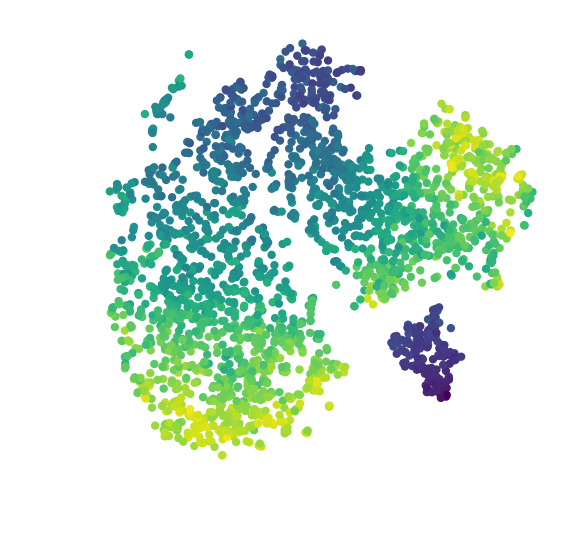

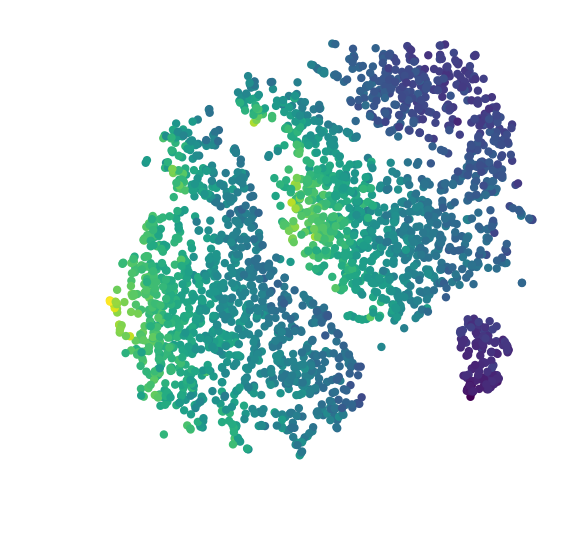

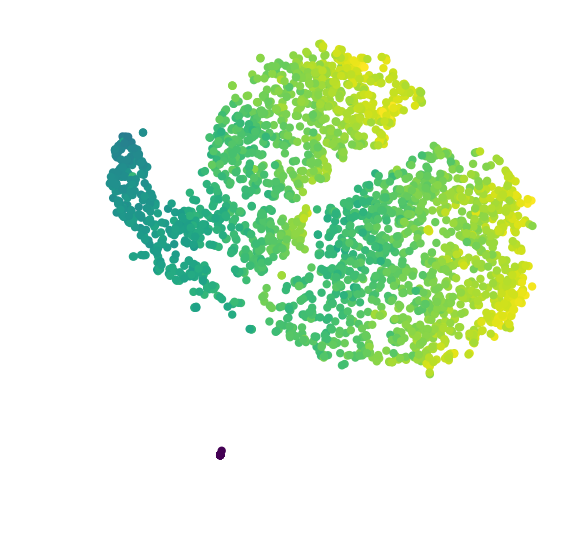

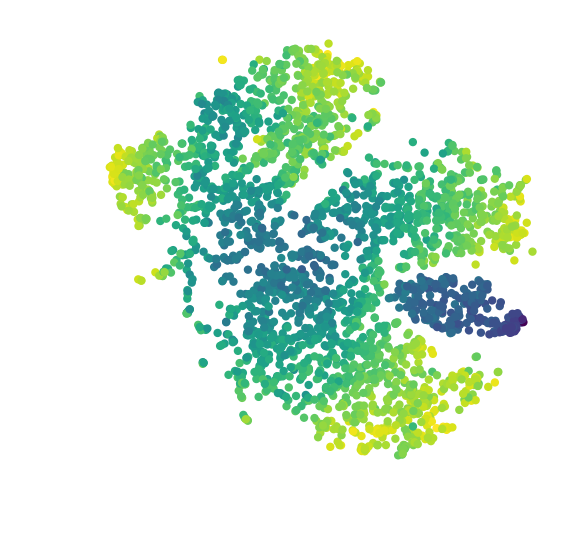

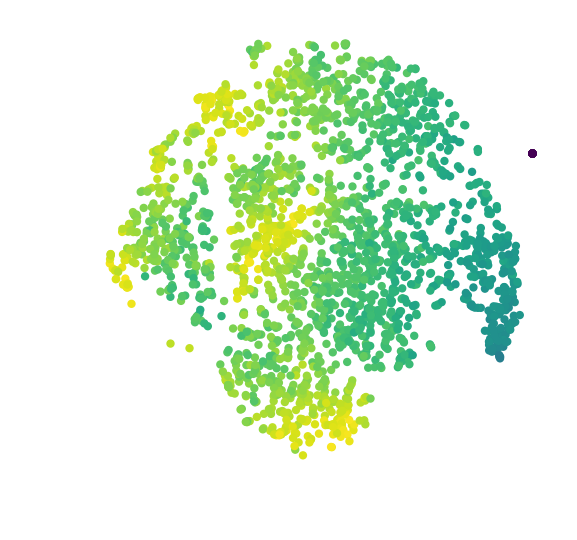

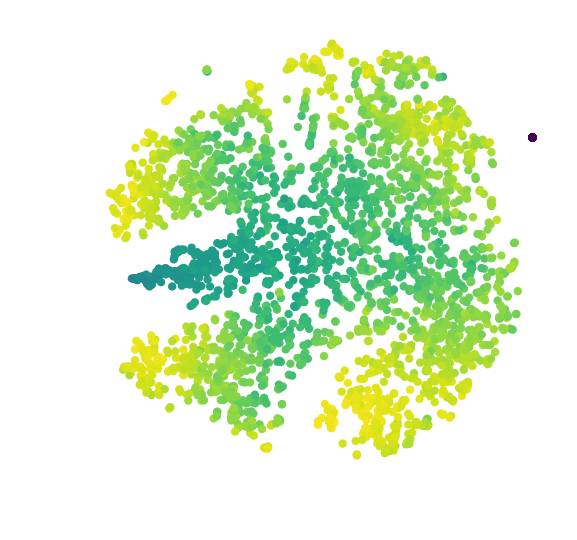

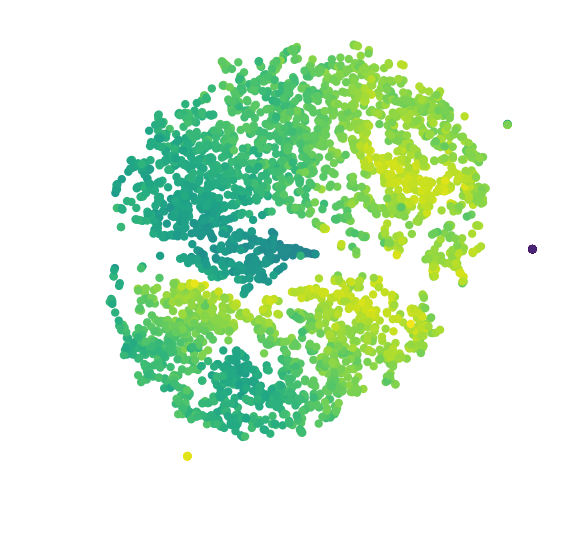

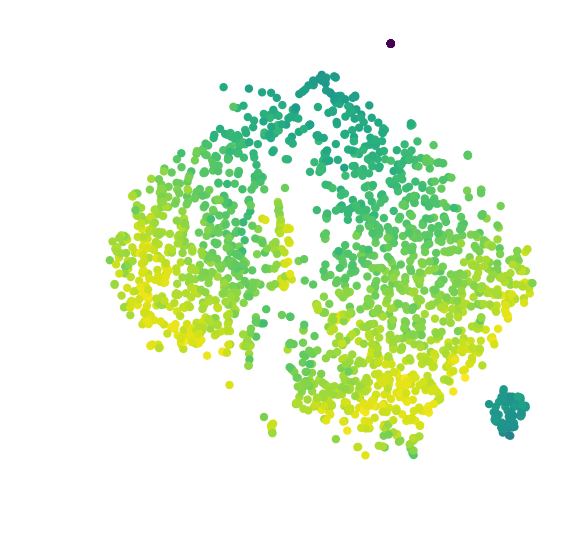

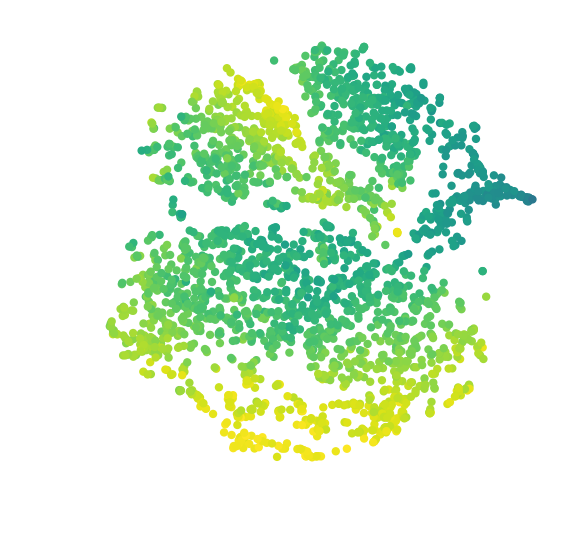

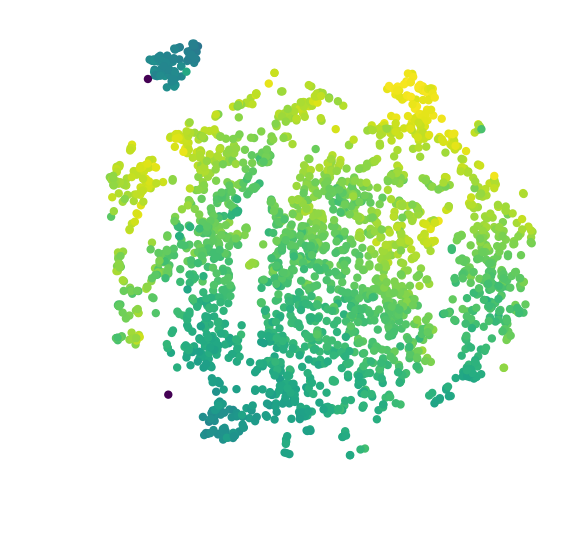

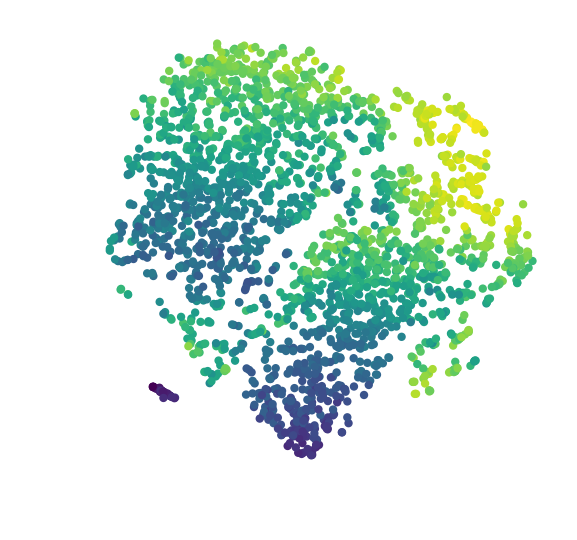

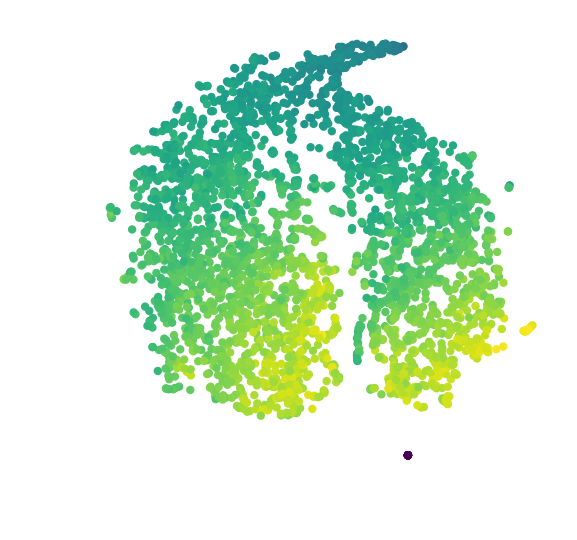

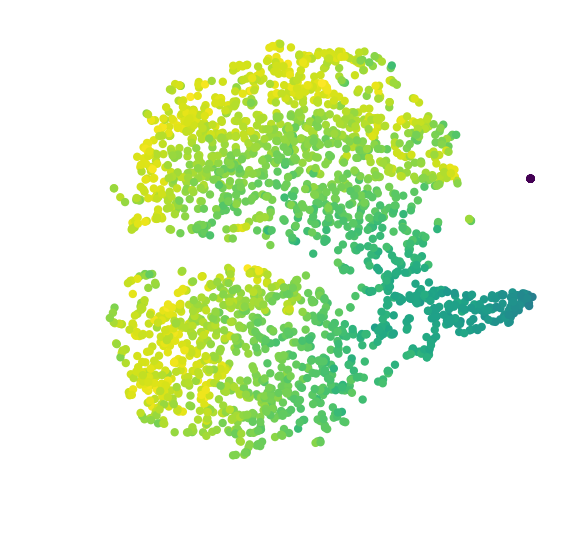

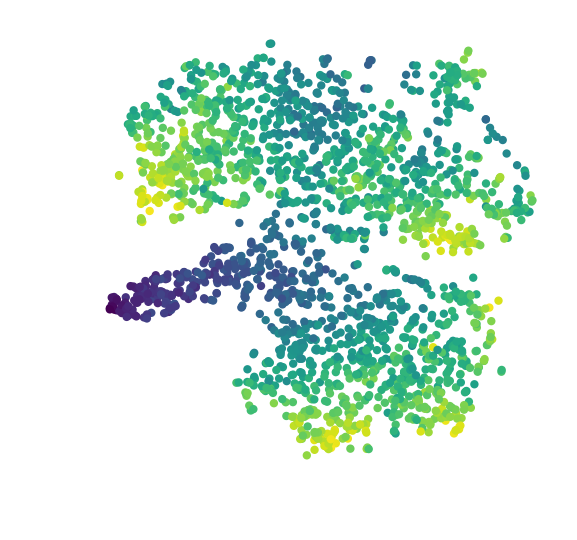

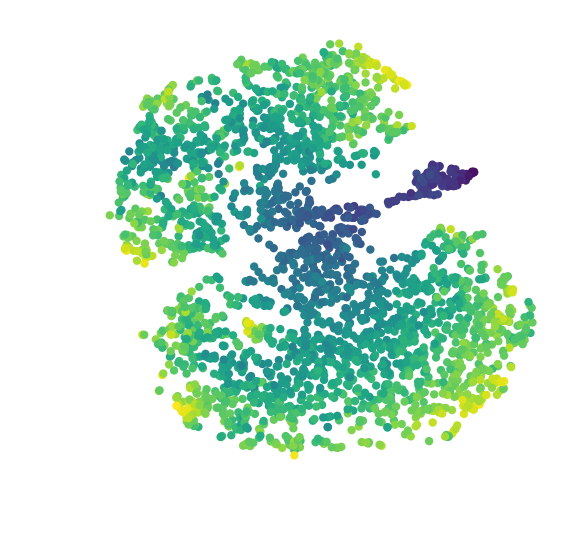

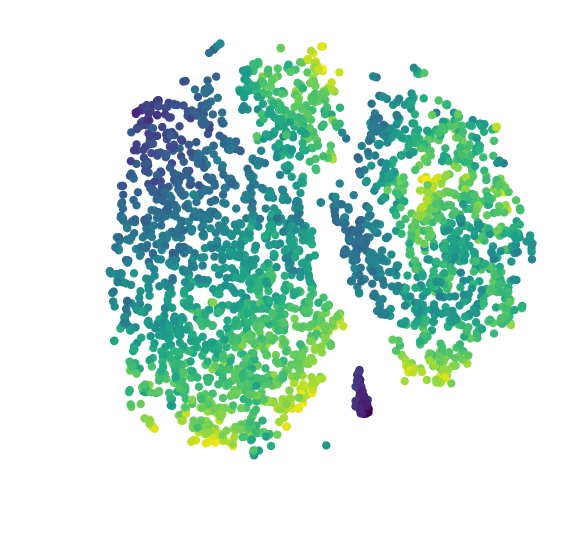

In [56]:
file_path = "/home/cqql/Seafile/thesis/16-gestures/data/val/gists.h5"
with h5.File(file_path) as f:
    label_index = list(f["label_index"])

for gesture in label_index:
    data, rel_time, num_events = read_data("/home/cqql/Seafile/thesis/16-gestures/data/val/gists.h5", gesture)
    
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=1000, verbose=2)
    data2d = tsne.fit_transform(data)
    
    fig, ax = pp.subplots(figsize=(3, 3), dpi=200)

    ax.axis("off")
    ax.scatter(data2d[:, 0], data2d[:, 1], c=num_events, s=4)
    
    fig.savefig(f"../doc/figures/methods/tsne/{gesture}.pdf", bbox_inches="tight")